# Logistic Regression

Despite it's name, **logistic regression** is used in **classification** problems, NOT in **regression**.

Using logistic regression for binary classification(when we hae two possible labels for the target variable), log reg will output a probability value for the target variable:

- if `p` is > 0.5, the data is labelled as `1`  .
- if `p` is < 0.5, it is labelled as `0`.

Log reg produces a linear decision boundary.

![Logistic regression](../imgs/logistic-regression-1.png)

### Implementing logistic regression in sklearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# prepare the data
df = pd.read_csv('../data/diabetes.csv')
X = df.drop('diabetes', axis=1).values
y = df.diabetes.values

print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (768, 8)
<class 'numpy.ndarray'> (768,)


In [18]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit the model and train the data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict labels
y_pred = logreg.predict(X_test)
y_pred[:10]

/media/theboymo/d64061fd-29fa-457c-8209-b6a7ed06885f/home/theboymo/MiniConda/envs/ml37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [19]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

   micro avg       0.78      0.78      0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



By default the log reg threshold is 0.5, but this is not specific to log reg. KNN classifiers also have thresholds.

What we need to consider is what happens to the **true positive** and **false positive** rates if we vary the threshold. 

When `p=0` the model predicts `1` for all the data

- the **true positive** rate and the **false positive** rate are both `1`.

When `p=1` the model predicts `0` for all the data

- the **true positive** rate and the **false positive** rate are both `0`.

![Logistic regression](../imgs/logistic-regression-2.png)

By varying the threshold between these two extremes we get a series of different true positive and false positive rates, the **ROC(reciever Operating Characteristic) curve**.

We can plot the **ROC curve** with sklearn, using the `roc_curve()` function. For each data point we predict the probability that it is either `0` or `1` - `y_pred_prob` using sklearn's `predict_proba()` function passing it the test data.

**Classification reports** and **confusion matrices** are great methods to quantitatively evaluate model performance, while **ROC curves** provide a way to visually evaluate models.  Most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class. Having built the logistic regression model, we'll now evaluate its performance by plotting an **ROC curve**.

In [12]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob[:5]

array([[0.61759133, 0.38240867],
       [0.77665825, 0.22334175],
       [0.78201184, 0.21798816],
       [0.7514654 , 0.2485346 ],
       [0.54381608, 0.45618392]])

The `predict_proba()` method returns the probabilities of both `0`(1st column) and `1`(2nd column). We limit ourselves to the probability that the target will be `1`, the second column.

In [13]:
y_pred_prob = y_pred_prob[:, 1] # grab 2nd column

We can now compute the **true positive rate**, `tpr`, the **false positive rate**, `fpr` and the `thresholds`.

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

We can then plot the `tpr` and `fpr` uaing `pyplot.plot()` function

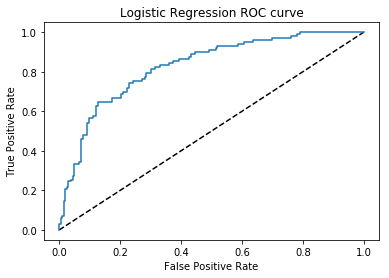

In [17]:
plt.plot([0, 1], [0, 1], 'k--') # plots the straight line
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show();

You may have noticed that the y-axis, **True positive rate** is also known as `recall`. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the **precision-recall curve**, which is generated by plotting the **precision** and **recall** for different thresholds.

![Logistic regression](../imgs/logistic-regression-3.png)

### Calculate the area under the ROC curve using sklearn

The larger the area under the curve, **AUC**, the better our model is. I t is thus a popular metric used to measure the performance of classification models.

To calculate **AUC**, we use sklearn's `roc_auc_score()` function:

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.8268608414239482

We can also compute **AUC** using **cross-validation**. Call sklean's `cross_val_score()` function passing it the `scoring='roc_auc'` property.

In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.79888889 0.80796296 0.81944444 0.86622642 0.85056604]


/media/theboymo/d64061fd-29fa-457c-8209-b6a7ed06885f/home/theboymo/MiniConda/envs/ml37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/theboymo/d64061fd-29fa-457c-8209-b6a7ed06885f/home/theboymo/MiniConda/envs/ml37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/theboymo/d64061fd-29fa-457c-8209-b6a7ed06885f/home/theboymo/MiniConda/envs/ml37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/theboymo/d64061fd-29fa-457c-8209-b6a7ed06885f/home/theboymo/MiniConda/envs/ml37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing.